In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("/content/train.csv")
data_test = pd.read_csv("/content/train.csv")
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
data.drop('Id',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
x=(data['x']==0).sum()
y=(data['y']==0).sum()
z=(data['z']==0).sum()
print('the number of zero in "x" coulumn is : ',x)
print('the number of zero in "y" coulumn is : ',y)
print('the number of zero in "z" coulumn is : ',z)

the number of zero in "x" coulumn is :  5
the number of zero in "y" coulumn is :  4
the number of zero in "z" coulumn is :  17


In [ ]:
#Dropping dimentionless diamonds, cuz I can Have diamonds with 0 dimentionl,so I remove them
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(43135, 10)

In [ ]:
data.duplicated().sum()

97

In [ ]:
data.drop_duplicates(keep='first', inplace=True, ignore_index=False)
data.duplicated().sum()

0

In [ ]:
# Get list of categorical variables,the resone I do this, is to trainsform the string values into numeric, that make the process easier to my model
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
# Make copy to avoid changing original data
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
# Combine training and test data for consistent label encoding
#The goal of this merging is to ensure that the same classes in the training and test data get the same codes.
combined_data = pd.concat([data[object_cols]])

# Fit label encoder on combined data
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(combined_data[col])
    data[col] = label_encoder.transform(data[col])

data.describe()


,carat,cut,color,clarity,depth,table,price,x,y,z
count,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000
mean,0.797475,2.555858,2.593545,3.831846,61.746582,57.459375,3928.189112,5.731744,5.735116,3.539926
std,0.472928,1.027032,1.702062,1.725014,1.434702,2.233822,3982.731057,1.118784,1.146848,0.704559
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5311.750000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


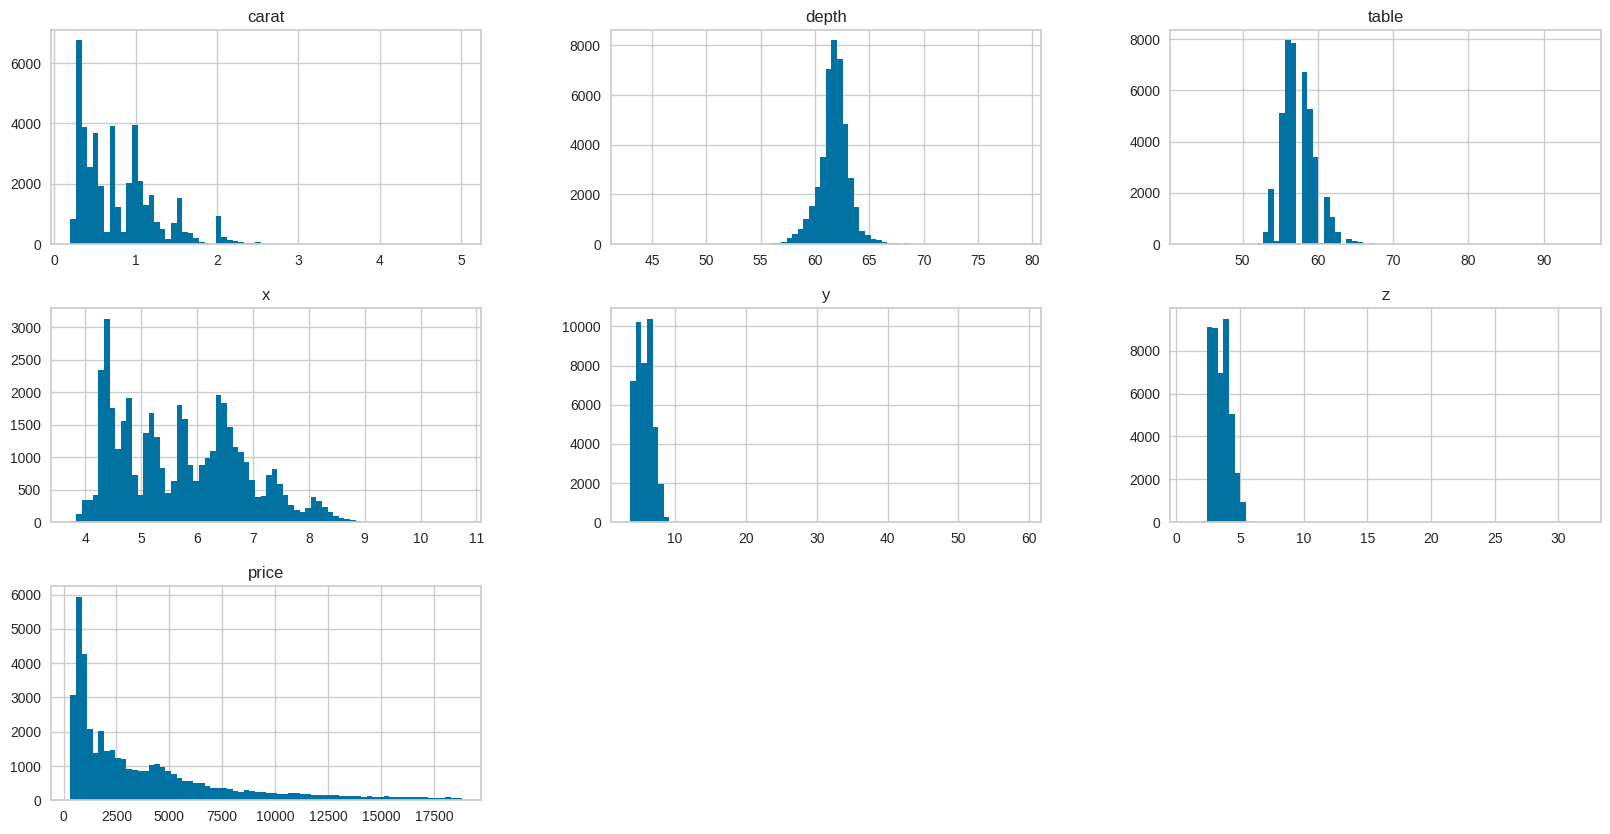

In [ ]:
data[['carat','depth','table','x','y','z','price']].hist(bins=70, figsize=(20,10))
plt.show()

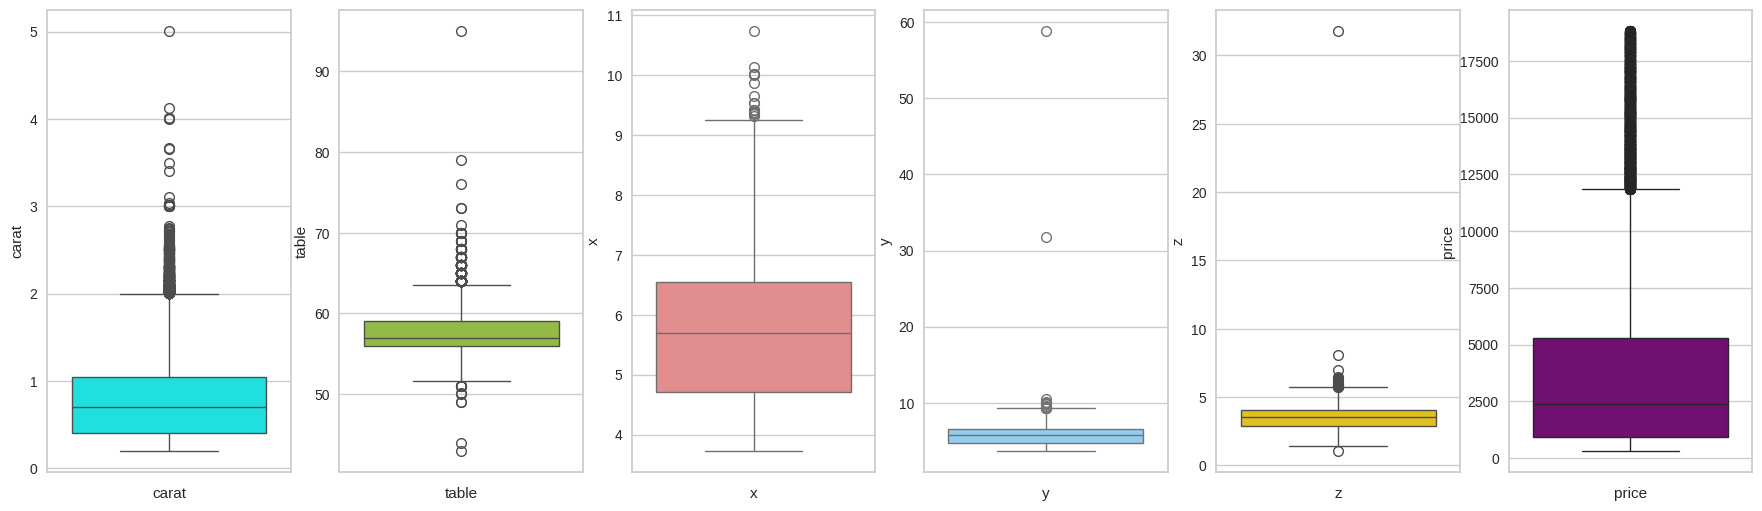

In [ ]:
columns = ['carat','table','x','y','z','price']
colors = ['Cyan','yellowgreen', 'lightcoral', 'lightskyblue','gold', 'purple']
fig, ax = plt.subplots(1, 6, figsize=(22, 6))

for i, column in enumerate(columns):
    sns.boxplot(data=data[column], ax=ax[i],color=colors[i])
    ax[i].set_xlabel(columns[i])
plt.show()

In [ ]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

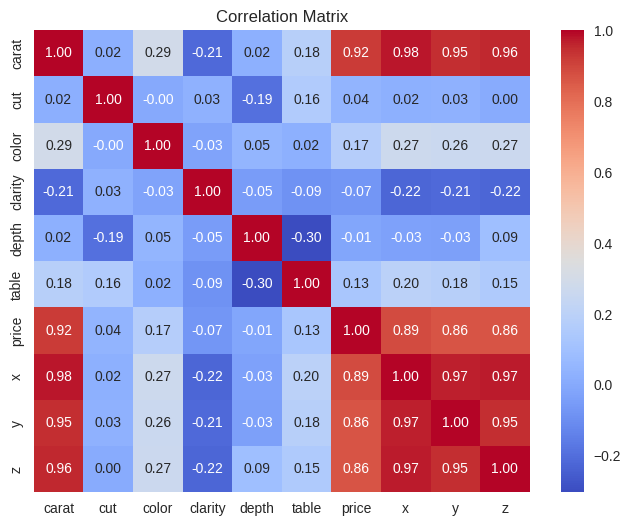

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# we shouldn't have more than one high correlated column 0.8,0.9 in the data :
# So we should remove the x,y,z columns and keep the cart becase it is the highiest one
data.drop(["x","y","z"],axis=1,inplace=True)

In [ ]:
attributes=data.drop('price',axis=1)
labels = data['price']

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])

pred= pipeline_rf.fit(X_train, y_train)
pred

Pipeline(steps=[('scalar3', StandardScaler()),
                ('rf_classifier', RandomForestRegressor())])

In [ ]:
cv_score = cross_val_score(pipeline_rf, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
print("RandomForest:",cv_score.mean())

RandomForest: -567.1479946712395


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Create a LinearRegression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
#!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [ ]:
# تثبيت مكتبة pycaret إذا لم تكن مثبتة
# !pip install pycaret

from pycaret.regression import setup, compare_models, finalize_model, predict_model, save_model

# إعداد البيانات كبيانات pycaret
data = label_data.copy()
data['price'] = y

# إعداد البيئة باستخدام pycaret
regression_setup = setup(data=data, target='price', train_size=0.8, session_id=42, verbose=False)

# مقارنة النماذج واختيار الأفضل
best_model = compare_models()

# تدرب على النموذج المختار
final_model = finalize_model(best_model)

# تقييم النموذج على بيانات الاختبار
predictions = predict_model(final_model, data=X_test)

# عرض نتائج التنبؤ
print(predictions)

# حفظ النموذج
save_model(final_model, 'best_regression_model')

# إذا كنت تريد استخدام النموذج لاحقًا، يمكنك تحميله باستخدام
# from pycaret.regression import load_model
# loaded_model = load_model('best_regression_model')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,287.6645,300925.0772,548.3274,0.9810,0.1098,0.0843,1.0590
et,Extra Trees Regressor,276.4141,310442.5594,556.9464,0.9804,0.0944,0.0677,9.3300
xgboost,Extreme Gradient Boosting,283.6945,318713.3307,564.1355,0.9799,0.0990,0.0730,0.3100
rf,Random Forest Regressor,280.5005,324705.7864,569.4270,0.9795,0.0945,0.0675,14.9490
gbr,Gradient Boosting Regressor,368.9992,454586.0471,673.9124,0.9713,0.1644,0.1144,3.4250
dt,Decision Tree Regressor,369.8919,571548.3297,755.5022,0.9639,0.1276,0.0884,0.2110
knn,K Neighbors Regressor,502.8889,889824.3130,942.7206,0.9438,0.1848,0.1418,0.2080
ada,AdaBoost Regressor,981.1514,1694125.6649,1300.9296,0.8930,0.4314,0.4626,1.7320
llar,Lasso Least Angle Regression,858.3441,1821920.6273,1348.9810,0.8849,0.6086,0.3811,0.0370
lasso,Lasso Regression,858.3198,1821778.9286,1348.9314,0.8849,0.6082,0.3812,0.2000


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

       carat  cut  color  clarity      depth  table     x     y     z  \
22941   0.30    4      1        7  62.400002   57.0  4.26  4.27  2.66   
2708    0.52    3      2        2  61.500000   60.0  5.16  5.15  3.17   
14968   0.71    2      2        6  61.099998   54.0  5.84  5.78  3.55   
18902   0.52    3      1        5  60.700001   58.0  5.21  5.17  3.15   
17674   1.77    1      6        3  63.400002   60.0  7.61  7.65  4.84   
...      ...  ...    ...      ...        ...    ...   ...   ...   ...   
29603   1.00    4      1        2  61.200001   60.0  6.39  6.42  3.92   
29908   1.01    1      1        7  63.299999   58.0  6.31  6.39  4.02   
27381   1.04    3      2        7  59.200001   58.0  6.68  6.66  3.95   
15382   1.20    3      4        3  62.200001   58.0  6.79  6.74  4.21   
5874    0.78    4      6        2  58.000000   61.0  6.07  6.13  3.54   

       prediction_label  
22941        710.625362  
2708        1444.788089  
14968       4240.180452  
18902       1749.25

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['carat', 'cut', 'color', 'clarity',
                                              'depth', 'table', 'x', 'y', 'z'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  LGBMRegressor(n_jobs=-1, random_state=42))]),
 'best_regression_model.pkl')

In [ ]:
#!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.2-py2.py3-none-any.whl size=265365378 sha256=9b5ffedc4903c1b296b26403d62d95a83b2c8d71964961832d91dc0b0deadf99
  Stored in directory: /root/.cache/pip/wheels/63/14/f4/9fff736a0df59884631031b604e7b000a70409f5b7adafc2c6
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# بدء جلسة H2O
h2o.init()

# تحميل البيانات إلى H2O
h2o_data = h2o.H2OFrame(label_data)

# تحديد ميزات الهدف
features = h2o_data.columns
target = 'price'
features.remove(target)

# تقسيم البيانات إلى مجموعة تدريب واختبار
train, test = h2o_data.split_frame(ratios=[.8], seed=42)

# إعداد AutoML
aml = H2OAutoML(max_models=20, seed=42)

# تدريب النماذج
aml.train(x=features, y=target, training_frame=train)

# الحصول على أفضل نموذج
best_model = aml.leader

# إجراء التنبؤات على مجموعة الاختبار
predictions = best_model.predict(test)

# طباعة التنبؤات
print(predictions.head())

# تقييم النموذج
performance = best_model.model_performance(test)
print(performance)

# حفظ النموذج
model_path = h2o.save_model(model=best_model, path="/content/sample_data", force=True)
print(f"Model saved to: {model_path}")

# لتحميل النموذج في المستقبل، يمكنك استخدام:
# loaded_model = h2o.load_model(model_path)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 21 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_mxbrsv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.169 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict
  895.611
 3268.52
 3168.05
18019
 4645.88
 3491.84
 2869.31
11535.9
 4639.05
 7133.31
[10 rows x 1 column]

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 241129.1345583147
RMSE: 491.04901441537856
MAE: 250.7241187365027
RMSLE: 0.0913367505822596
Mean Residual Deviance: 241129.1345583147
R^2: 0.984847449194858
Null degrees of freedom: 8518
Residual degrees of freedom: 8508
Null deviance: 135590880809.66594
Residual deviance: 2054179097.3022828
AIC: 129776.59052337798
Model saved to: /content/sample_data/StackedEnsemble_AllModels_1_AutoML_2_20240531_110241


In [ ]:
#!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=c84c51bf44365786b342c5502c4c7e652a1b319a0383ffb2b067b0b443d22043
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

# تحديد الإعدادات المطلوبة
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)

# تشغيل TPOT لتوليد النموذج
tpot.fit(X_train, y_train)

# عرض الأفضل نموذج ونسخة من الكود الخاص به
print(tpot.fitted_pipeline_)

# تقييم النموذج على مجموعة الاختبار
print(tpot.score(X_test, y_test))

# حفظ النموذج
tpot.export('tpot_best_model.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -375872.05856371456

Generation 2 - Current best internal CV score: -329705.25817435683

Generation 3 - Current best internal CV score: -329705.25817435683

Generation 4 - Current best internal CV score: -329705.25817435683

Generation 5 - Current best internal CV score: -326775.9787684129

Best pipeline: RandomForestRegressor(RobustScaler(input_matrix), bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=10, n_estimators=100)
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.7500000000000001,
                                       min_samples_leaf=2, min_samples_split=10,
                                       random_state=42))])
-306802.2449098751
